In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('/content/sample_data/HyderabadResturants.csv')
df.head()

,links,names,ratings,cuisine,price for one
0,https://www.zomato.com/hyderabad/sahara-bakers...,Sahara Bakers,3.7,"Chinese, Bakery, Sichuan, Pizza, Burger",100
1,https://www.zomato.com/hyderabad/kfc-abids/order,KFC,3.9,"Burger, Fast Food, Biryani, Desserts, Beverages",100
2,https://www.zomato.com/hyderabad/subbaiah-gari...,Subbaiah Gari Hotel,4.1,"South Indian, Andhra, Mithai",100
3,https://www.zomato.com/hyderabad/paradise-biry...,Paradise Biryani,3.9,"Biryani, Kebab, Desserts, Beverages",100
4,https://www.zomato.com/hyderabad/pista-house-b...,Pista House Bakery,4.3,"Fast Food, Sandwich, Pizza, Burger, Wraps, Rol...",100


In [4]:
df.describe()

,price for one
count,657.000000
mean,169.406393
std,97.178712
min,50.000000
25%,100.000000
50%,150.000000
75%,250.000000
max,400.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   links          657 non-null    object
 1   names          657 non-null    object
 2   ratings        657 non-null    object
 3   cuisine        657 non-null    object
 4   price for one  657 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 25.8+ KB


In [6]:
df.shape

(657, 5)

In [7]:
df.isnull().sum()

,0
links,0
names,0
ratings,0
cuisine,0
price for one,0


In [8]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isna().sum()

,0
links,0
names,0
ratings,0
cuisine,0
price for one,0


In [14]:
# Convert ratings to numeric, turning 'NEW' or '-' into NaN (Not a Number)
df['ratings_cleaned'] = pd.to_numeric(df['ratings'], errors='coerce')

# Fill the NaN values with the median of the existing ratings
median_rating = df['ratings_cleaned'].median()
df['ratings_cleaned'].fillna(median_rating)

print(f"Filled {df['ratings_cleaned'].isnull().sum()} 'NEW' ratings with median: {median_rating}")

Filled 67 'NEW' ratings with median: 4.0


In [15]:
import re

def extract_locality(link):
    # Regex to find the part between the last two hyphens or before '/order'
    # Example: https://www.zomato.com/hyderabad/subbaiah-gari-hotel-malakpet/order -> malakpet
    try:
        match = re.search(r'hyderabad/([^/]+)', link)
        if match:
            slug = match.group(1)
            # Typically locality is the last word in the slug
            return slug.split('-')[-1]
    except:
        return "Unknown"

df['locality'] = df['links'].apply(extract_locality)

# Standardize common names (e.g., 'nagar' appears often)
print("Top 5 Localities Found:")
print(df['locality'].value_counts().head())

Top 5 Localities Found:
locality
nagar           115
dilsukhnagar     78
hills            68
malakpet         34
mehdipatnam      31
Name: count, dtype: int64


In [16]:
df.head()

,links,names,ratings,cuisine,price for one,ratings_cleaned,locality
0,https://www.zomato.com/hyderabad/sahara-bakers...,Sahara Bakers,3.7,"Chinese, Bakery, Sichuan, Pizza, Burger",100,3.7,roads
1,https://www.zomato.com/hyderabad/kfc-abids/order,KFC,3.9,"Burger, Fast Food, Biryani, Desserts, Beverages",100,3.9,abids
2,https://www.zomato.com/hyderabad/subbaiah-gari...,Subbaiah Gari Hotel,4.1,"South Indian, Andhra, Mithai",100,4.1,malakpet
3,https://www.zomato.com/hyderabad/paradise-biry...,Paradise Biryani,3.9,"Biryani, Kebab, Desserts, Beverages",100,3.9,charminar
4,https://www.zomato.com/hyderabad/pista-house-b...,Pista House Bakery,4.3,"Fast Food, Sandwich, Pizza, Burger, Wraps, Rol...",100,4.3,bazaar


In [25]:
# Normalize Cuisines and Names using basic string methods
df['cuisine_norm'] = df['cuisine'].str.lower().str.strip()
df['names_norm'] = df['names'].str.lower().str.strip()

# Check the first few rows
print(df[['cuisine', 'cuisine_norm']].head())

                                             cuisine  \
0            Chinese, Bakery, Sichuan, Pizza, Burger   
1    Burger, Fast Food, Biryani, Desserts, Beverages   
2                       South Indian, Andhra, Mithai   
3                Biryani, Kebab, Desserts, Beverages   
4  Fast Food, Sandwich, Pizza, Burger, Wraps, Rol...   

                                        cuisine_norm  
0            chinese, bakery, sichuan, pizza, burger  
1    burger, fast food, biryani, desserts, beverages  
2                       south indian, andhra, mithai  
3                biryani, kebab, desserts, beverages  
4  fast food, sandwich, pizza, burger, wraps, rol...  


/tmp/ipython-input-429676581.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_cuisines.values, y=top_10_cuisines.index, palette='viridis')


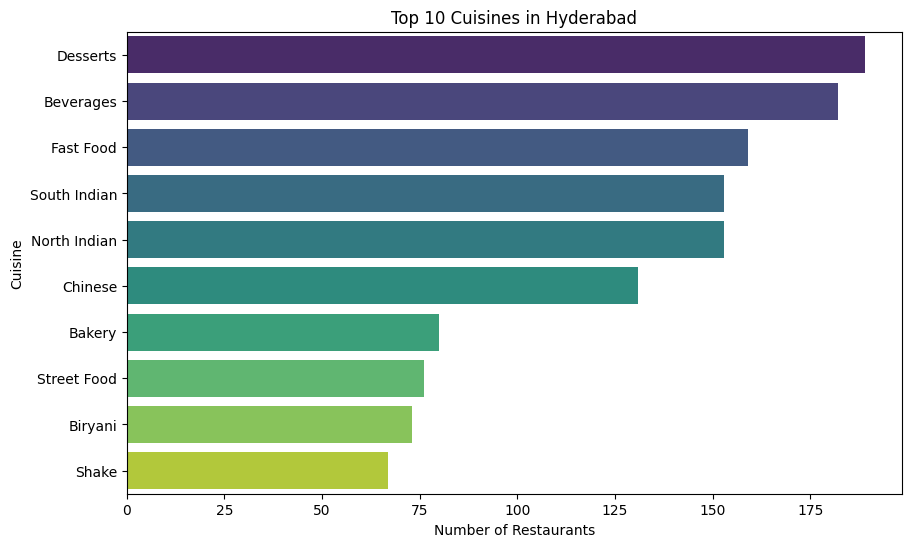

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explode the cuisines because one restaurant has many (e.g., "Biryani, Chinese")
all_cuisines = df['cuisine'].str.split(', ').explode()

# Get the top 10 cuisines and their counts
top_10_cuisines = all_cuisines.value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_10_cuisines.values, y=top_10_cuisines.index, palette='viridis')
plt.title('Top 10 Cuisines in Hyderabad')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.show()

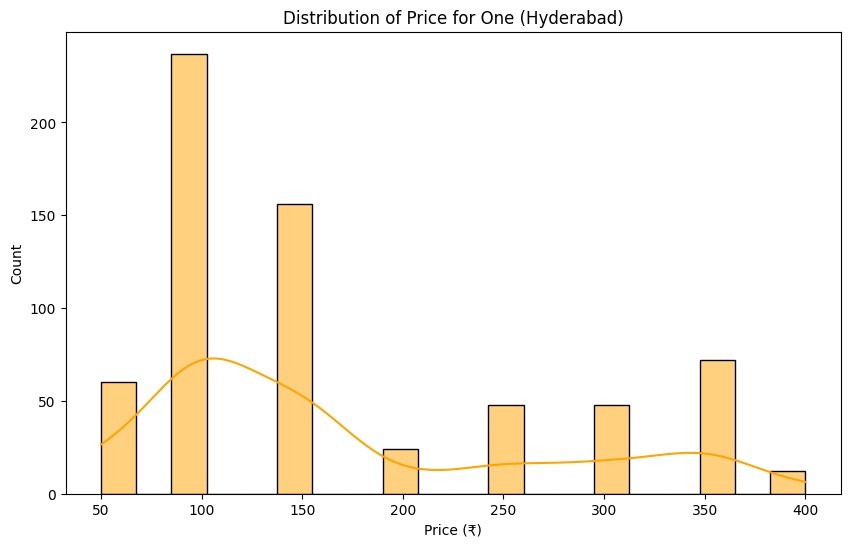

In [27]:
plt.figure(figsize=(10,6))
sns.histplot(df['price for one'], bins=20, kde=True, color='orange')
plt.title('Distribution of Price for One (Hyderabad)')
plt.xlabel('Price (₹)')
plt.show()

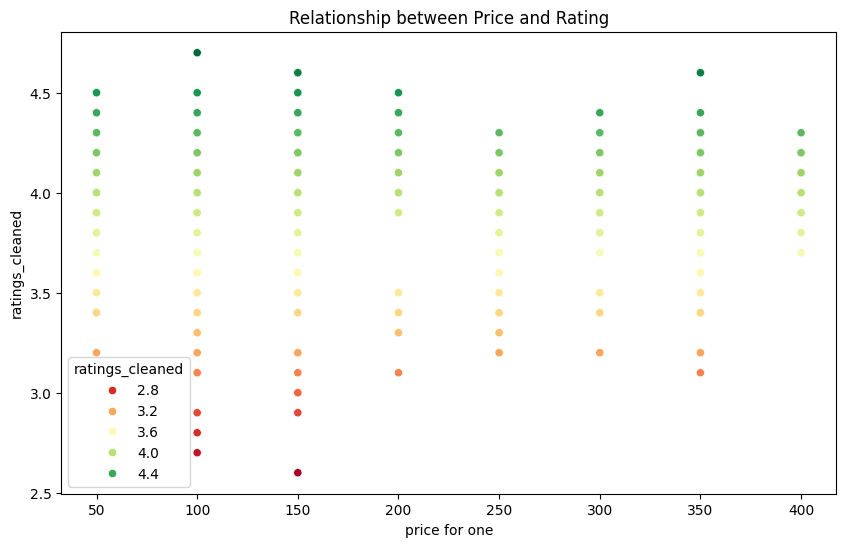

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='price for one', y='ratings_cleaned', hue='ratings_cleaned', palette='RdYlGn')
plt.title('Relationship between Price and Rating')
plt.show()

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 1. Initialize the Vectorizer
# We use stop_words='english' to ignore common words like 'and' or 'the'
tfidf = TfidfVectorizer(stop_words='english')

# 2. Fit and Transform the Normalized Cuisines
# This creates a matrix of numbers representing your 657 restaurants
tfidf_matrix = tfidf.fit_transform(df['cuisine_norm'])

# 3. Compute the Cosine Similarity Matrix
# This compares every restaurant to every other restaurant in your dataset
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

print(f"Similarity Matrix Shape: {cosine_sim.shape}")

Similarity Matrix Shape: (657, 657)


In [39]:
def get_recommendations(res_name, cosine_sim=cosine_sim):
    try:
        # 1. Flexible search: Find the first restaurant that contains the input string
        # This helps if you type 'Paradise' instead of 'Paradise Biryani'
        match_df = df[df['names'].str.contains(res_name, case=False, na=False)]

        if match_df.empty:
            return "Restaurant not found in the database. Try a different name!"

        idx = match_df.index[0]
        actual_name = df.iloc[idx]['names']

        # 2. Get similarity scores
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # 3. Get top 5 (excluding itself)
        sim_scores = sim_scores[1:6]
        res_indices = [i[0] for i in sim_scores]

        print(f"Showing recommendations for: {actual_name}")
        return df.iloc[res_indices][['names', 'cuisine', 'ratings', 'price for one', 'locality']]

    except Exception as e:
        return f"An error occurred: {e}"

# Test it with just a keyword
print(get_recommendations('paradise'))

Showing recommendations for: Paradise Biryani
                                  names  \
621           Potful - Claypot Biryanis   
37                      Behrouz Biryani   
303  Aarth - Authentic Claypot Biryanis   
245                     Makhni Brothers   
118                        Hotel Sohail   

                                               cuisine ratings  price for one  \
621  Biryani, Kebab, Mughlai, North Indian, Dessert...     4.1            350   
37                   Biryani, Mughlai, Kebab, Desserts     3.9            400   
303                         Biryani, Hyderabadi, Kebab     3.9            200   
245  North Indian, Kebab, Biryani, Hyderabadi, Mugh...     3.7            100   
118  North Indian, Mughlai, Kebab, Chinese, Beverag...     4.2            150   

         locality  
621   khairatabad  
37          abids  
303      kothapet  
245  dilsukhnagar  
118      malakpet  


In [40]:
def get_hybrid_recommendations(target_res, area=None, budget=None):
    try:
        # 1. Locate the restaurant in our dataframe
        idx = df[df['names'].str.contains(target_res, case=False, na=False)].index[0]

        # 2. Extract similarity scores from our pre-computed matrix
        sim_scores = list(enumerate(cosine_sim[idx]))

        # 3. Sort by similarity (descending)
        # We take top 100 to have a large enough pool for filtering
        sorted_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:101]

        # 4. Create a temporary dataframe for our candidates
        candidate_indices = [i[0] for i in sorted_scores]
        candidates = df.iloc[candidate_indices].copy()
        candidates['sim_score'] = [i[1] for i in sorted_scores]

        # 5. Apply User-Driven Filters (The "Hybrid" Part)
        if area:
            candidates = candidates[candidates['locality'].str.contains(area, case=False)]

        if budget:
            candidates = candidates[candidates['price for one'] <= budget]

        # 6. Final check: If filters are too strict, return top 5 overall similar
        if candidates.empty:
            return "No restaurants match those specific filters. Try increasing your budget or area."

        return candidates.head(5)[['names', 'cuisine', 'ratings', 'price for one', 'locality']]

    except Exception as e:
        return f"Error in processing: {e}"

# Example Use: "I like KFC, but find me something in 'Abids' under 150 bucks"
print(get_hybrid_recommendations('KFC', area='abids', budget=150))

                     names                                            cuisine  \
54  Faasos - Wraps & Rolls  Fast Food, Wraps, North Indian, Desserts, Beve...   

   ratings  price for one locality  
54       4             50    abids  


In [41]:
def evaluate_recommender(n_tests=10):
    # Select random restaurants to test consistency
    test_samples = df.sample(n_tests)
    relevance_scores = []

    for _, row in test_samples.iterrows():
        results = get_hybrid_recommendations(row['names'])

        if isinstance(results, pd.DataFrame):
            # Check if the top result shares at least one cuisine tag
            original_cuisines = set(row['cuisine'].lower().split(', '))
            top_rec_cuisines = set(results.iloc[0]['cuisine'].lower().split(', '))

            common = original_cuisines.intersection(top_rec_cuisines)
            relevance_scores.append(1 if len(common) > 0 else 0)

    accuracy = (sum(relevance_scores) / n_tests) * 100
    print(f"Content Relevance Accuracy (Top-1): {accuracy}%")

evaluate_recommender(n_tests=20)

Content Relevance Accuracy (Top-1): 95.0%


/tmp/ipython-input-1594340623.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  idx = df[df['names'].str.contains(target_res, case=False, na=False)].index[0]


In [43]:
import joblib
import os

# Create the 'models' directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save the essential pieces for the Streamlit app
joblib.dump(cosine_sim, 'models/similarity_matrix.pkl')
joblib.dump(df, 'models/restaurant_data.pkl')

print("Models exported successfully for Streamlit deployment!")

Models exported successfully for Streamlit deployment!
